In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
from PIL import Image
import pylab

%matplotlib inline

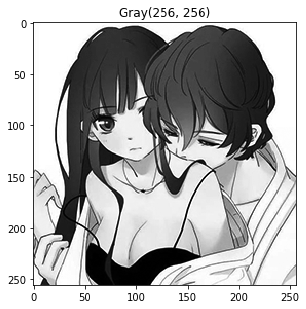

In [2]:
pylab.rcParams['figure.figsize'] = (16.0, 16.0) # 显示大小

gray = np.array(plt.imread("images/lovers_gray.bmp")) * 1.0 # necessary: int convert to float
plt.subplot(2, 3, 2)
plt.title("Gray" + str(gray.shape))
plt.imshow(gray, cmap=plt.cm.gray)

plt.show()

In [74]:
global __plt_index
__plt_index = 0

def Pooling(pixels, filterSize, stride, padding, func):
    pixelW = pixels.shape[1]
    pixelH = pixels.shape[0]
    outputW = math.floor((pixelW + 2 * padding - filterSize) / stride + 1)
    outputH = math.floor((pixelH + 2 * padding - filterSize) / stride + 1)
    rets = np.zeros((outputH, outputW))
    block = np.zeros((filterSize, filterSize))
    for u in range(outputW):
        for v in range(outputH):
            block *= 0
            for i in range(filterSize):
                for j in range(filterSize):
                    ui = stride * u - padding + i
                    vj = stride * v - padding + j
                    if (ui >= 0 and vj >= 0 and ui < pixelW and vj < pixelH):
                        block[i][j] = pixels[ui][vj]
            rets[u][v] = func(block)
            
    global __plt_index
    __plt_index += 1
    plt.subplot(3, 3, __plt_index)
    plt.title('{4} filter:{0} stride:{1} padding:{2} {3}'.format(filterSize, stride, padding, func.__name__, rets.shape))
    plt.imshow(rets, cmap=plt.cm.gray)

def MaxPool(block):
    return np.max(block)

def AveragePool(block):
    return np.sum(block) / (block.shape[0] * block.shape[1])

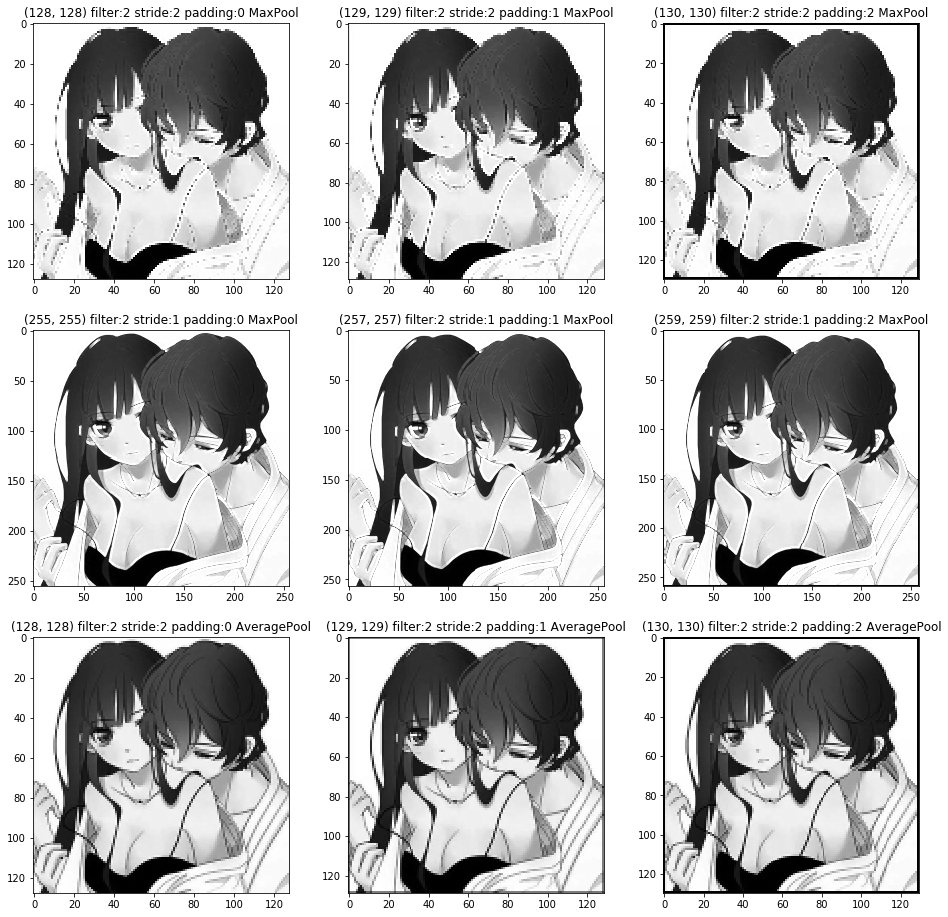

In [75]:
pylab.rcParams['figure.figsize'] = (16.0, 16.0) # 显示大小

global __plt_index
__plt_index = 0

Pooling(gray, 2, 2, 0, MaxPool)
Pooling(gray, 2, 2, 1, MaxPool)
Pooling(gray, 2, 2, 2, MaxPool)

Pooling(gray, 2, 1, 0, MaxPool)
Pooling(gray, 2, 1, 1, MaxPool)
Pooling(gray, 2, 1, 2, MaxPool)

Pooling(gray, 2, 2, 0, AveragePool)
Pooling(gray, 2, 2, 1, AveragePool)
Pooling(gray, 2, 2, 2, AveragePool)